In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats
import scipy.optimize
import numdifftools as nd
from numdifftools import Jacobian, Hessian
sns.set()

In [3]:
#!pip install numdifftools

In [4]:
pd.set_option('precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
#df = pd.read_csv("https://raw.githubusercontent.com/Oliverkobaek/thesis_2020/master/Bresnahan/Bresnahan_data_2.csv")
#df = pd.read_csv("Bresnahan_data_full_inf.csv")
df = pd.read_csv("https://raw.githubusercontent.com/Oliverkobaek/thesis_2020/master/Bresnahan/by%20markeder/Bresnahan_data_by.csv")


df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df['receptgrænse'] = 270000*1.02317**(df['År']-2011)

år = list(range(2008,2019))
# vi har indsat 0 i år efter 2015 for at sikre at disse markeder ikke er restrikteret
gnsrecept = [13.1, 13.12, 13.19, 13.13, 13.24, 13.26, 13.53, 13.13, 0 ,0 ,0]
gnsreceptdic = {}
for i in range(len(gnsrecept)):
    gnsreceptdic[år[i]] = gnsrecept[i]
    
restriction = []

for år in range(2008,2019):
    liste = list((df['Befolkning'][df['År']==år]*gnsreceptdic[år]-df['receptgrænse'][df['År']==år]*df['antal_apo'][df['År']==år])>=df['receptgrænse'][df['År']==år])
    for i in liste:
        restriction.append(i)
        
df['restriction'] = restriction

In [15]:
df['yder_mono'].describe()

count   3501.00
mean       0.26
std        0.44
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        1.00
Name: yder_mono, dtype: float64

In [13]:
## FIX YDERKOMMUNER ##
df_komkode_yder = pd.read_excel('kommunerkoderyder.xlsx')
df = df.merge(df_komkode_yder, on = "Kommune")
df  = df.drop('yderkom', axis = 1)
df = df.rename(columns={'Yderkommuner':'yderkom'})

In [14]:
df['yder_mono'] = ((df['antal_apo']<=1)* (df['yderkom']==1))
df['yder_mono'] = df['yder_mono'].astype(int)

In [16]:
# Fjerner København
#
#storbyer = [101, 147, 461, 751, 851] #
#storbyer = [101, 147, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 173, 175, 183, 185]

  
#for i in storbyer:
#    df = df[df['Kommune'] != i]
    
    
#df = df[df['Kommune'] != 101]
#df = df[df['Kommune'] != 147]
#df = df[df['Kommune']]

#år = [2008, 2009, 2010, 2011, 2012, 2013, 2014]
    

#df = df[(df['År'] == 2015) # & (df['År'] !=  2016) & (df['År'] !=  2017) & (df['År'] !=  2018)]

#df = df[(df['År'] != 2008) & (df['År'] !=  2009) & (df['År'] !=  2010) & (df['År'] !=  2011)& (df['År'] !=  2012)& (df['År'] !=  2013)& (df['År'] !=  2014)]
#df = df[(df['År'] == 2017)] & (df['År'] !=  2015)

df['logbefolkning'] = df['By_befolkning']/1000
df['logmarkedsvalue'] = df['markedsvaerdix']/100000 #np.log()
df['logindkomst'] = df['samlet_ind']/100000 #np.log()

# Unrestricted markets
df = df[df['restriction']==False]

In [17]:
df

,Kommune,by,By_befolkning,ALDER,d65,d17,samlet_ind,Besk,Besk1864,DK,...,År,antal_apo,receptgrænse,restriction,yder_mono,Navn,yderkom,logbefolkning,logmarkedsvalue,logindkomst
6,101,København,591481,35.36,0.10,0.18,213923.14,0.54,0.72,0.76,...,2016,22,302762.97,False,0,København,0,591.48,19.85,2.14
7,101,København,602481,35.39,0.10,0.18,213433.78,0.55,0.73,0.75,...,2017,24,309777.99,False,0,København,0,602.48,20.31,2.13
8,101,København,613288,35.45,0.10,0.18,219838.02,0.56,0.74,0.75,...,2018,26,316955.54,False,0,København,0,613.29,21.61,2.20
9,147,Frederiksberg,100115,39.06,0.16,0.17,222330.66,0.52,0.74,0.84,...,2010,5,263885.77,False,0,Frederiksberg,0,100.11,17.83,2.22
10,147,Frederiksberg,102192,38.91,0.16,0.17,218150.97,0.52,0.74,0.83,...,2011,5,270000.00,False,0,Frederiksberg,0,102.19,18.53,2.18
11,147,Frederiksberg,103636,38.73,0.16,0.17,219531.76,0.52,0.74,0.83,...,2012,5,276255.90,False,0,Frederiksberg,0,103.64,19.42,2.20
12,147,Frederiksberg,105464,38.74,0.16,0.17,221167.92,0.52,0.74,0.83,...,2013,5,282656.75,False,0,Frederiksberg,0,105.46,20.52,2.21
13,147,Frederiksberg,106160,38.82,0.17,0.18,226252.74,0.52,0.75,0.83,...,2014,5,289205.91,False,0,Frederiksberg,0,106.16,20.27,2.26
14,147,Frederiksberg,106653,38.84,0.17,0.17,230605.31,0.52,0.75,0.82,...,2015,5,295906.81,False,0,Frederiksberg,0,106.65,22.45,2.31
15,147,Frederiksberg,107944,38.93,0.17,0.18,236437.17,0.53,0.76,0.82,...,2016,6,302762.97,False,0,Frederiksberg,0,107.94,23.81,2.36


In [18]:
def V(df, Ni, alpha=np.ones(5), beta=np.ones(6)):
    """Per-capita variable profit
    
    df: data
    Ni: number of incumbents in market i
    alpha: alpha parameters
    beta: beta parameter
    """
    n = np.min([5, Ni])
#     n = Ni
    a = 0
    for i in range(1,n):
        a = a + alpha[i]
    

    Z = np.c_[df.d65, df.d17, df.logindkomst, df.Besk1864, df.DK, df.yder_mono]# np.log()

    # W = df.LANDV
    # X = np.c_[W, Z]

    X = np.c_[Z]
    
    
    profit = alpha[0] + X @ beta - a
    return profit

def F(df, Ni, gamma=np.ones(5)):
    n = np.min([5, Ni])
#     n = Ni
    g = 0
    # gamma 2 through gamma 5 (indices 1 through 4)
    for i in range(1,n):
        g = g + gamma[i]

    fixed_cost = gamma[0] + gamma[5]*df.logmarkedsvalue + g
    return fixed_cost

#def S_func(df, lam):
def S_func(df, lam): #, lam
    S =   lam * df.logbefolkning #np.log() #
    return S

#def neg_log_lik(theta=np.ones(19), market='TIRE', df=None):
def neg_log_lik(theta=np.ones(18), market='antal_apo', df=df):#, df=None):
    lam = theta[0]
    beta = theta[1:7]
    alpha = theta[7:12]
    gamma = theta[12:18]
#    beta = theta[0:5]
#    alpha = theta[5:10]
#    gamma = theta[10:16]
    
    
    Phi = scipy.stats.norm.cdf
    
    S = S_func(df, lam) #, lam

    
    P = [0] * 6
    Pi_bar = lambda N: S * V(df, N, alpha=alpha, beta=beta) - F(df, N, gamma=gamma)
    P[0] = np.log( 1 - Phi(Pi_bar(0)) )
    P[5] = np.log( Phi(Pi_bar(5)) )
    for i in range(1,5):
        P[i] = np.log( Phi(Pi_bar(i)) - Phi(Pi_bar(i+1)) )

        
    for i in range(6):
        P[i][P[i] == -np.inf] = -100000000
    log_lik = 0 
    for i in range(5):
        log_lik = log_lik + np.sum(P[i] * (df[market] == i))
    log_lik = log_lik + np.sum(P[5] * (df[market] >= 5))
    return -log_lik


def theta_to_param_dict(theta):
    lam = theta[0]
    beta = theta[1:7]
    alpha = theta[7:12]
    gamma = theta[12:18]
#    beta = theta[0:5]
#    alpha = theta[5:10]
#    gamma = theta[10:16]
    
    
    d = {'lam': lam, 'beta': beta, 'alpha': alpha, 'gamma': gamma, 'theta': theta} 
    return d

In [19]:
theta0 = np.ones(18) * 0.1
neg_log_lik(df=df, theta=theta0)

C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log


3989.340219747284

In [20]:
%%time
ba = [-np.inf] * 7
bb = [0] * 10
lower_bounds = [*ba, *bb, -np.inf]
upper_bounds = [np.inf] * 18
bounds = list(zip(lower_bounds, upper_bounds))


theta0 = np.ones(18) * 0.1
nll = lambda theta: neg_log_lik(theta=theta, df=df)
out = scipy.optimize.minimize(nll, theta0, bounds=bounds,
    options={'disp': False, 'maxiter': 10000}
    )

C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log


Wall time: 1min 54s


In [21]:
out

      fun: 1202.7928593913698
 hess_inv: <18x18 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.06295977,  0.03462901,  0.03769856, -0.16018475,  0.00629825,
        0.05529728, -0.0550699 ,  0.06202754, -0.03362857, -0.04054073,
       -0.1495664 , -0.20568223,  0.00311502, -0.11264092,  0.00859472,
        0.11993961,  1.44686965,  0.20127118])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 7771
      nit: 323
   status: 0
  success: True
        x: array([ 0.5338357 ,  0.4886765 , -1.87856791, -0.07666288,  0.79906108,
        0.33888619, -0.04243678,  0.09352831,  0.32524403,  0.05424832,
        0.03711049,  0.02225512,  0.52735176,  2.00193649,  0.62229621,
        0.31031446,  0.        ,  0.01871165])

In [22]:
Hfun = nd.Hessian(nll, full_output=True)
hessian_nd, info= Hfun(out['x'])
se = np.sqrt(np.diag(np.linalg.inv(hessian_nd)))
results = pd.DataFrame({'parameters':out['x'],'std err':se})
results.index=['lambda - befolkning','beta_1 - d65','beta_2 - d17','beta_3 - indkomst','beta_4 - besk','beta_5 - Foreigner', 'beta_6 - yderkom','alpha_1','alpha_2','alpha_3','alpha_4','alpha_5','gamma_1','gamma_2','gamma_3','gamma_4','gamma_5', 'gamma_6 - Landvalue'] #,'gamma6'  


C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in log
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
results.index=['lambda - befolkning','beta_1 - d65','beta_2 - d17','beta_3 - indkomst','beta_4 - besk','beta_5 - Foreigner', 'beta_6 - yderkom','alpha_1','alpha_2','alpha_3','alpha_4','alpha_5','gamma_1','gamma_2','gamma_3','gamma_4','gamma_5', 'gamma_6 - Landvalue']

In [24]:
results

,parameters,std err
lambda - befolkning,0.53,nan
beta_1 - d65,0.49,0.13
beta_2 - d17,-1.88,nan
beta_3 - indkomst,-0.08,nan
beta_4 - besk,0.80,nan
beta_5 - Foreigner,0.34,nan
beta_6 - yderkom,-0.04,0.02
alpha_1,0.09,0.09
alpha_2,0.33,nan
alpha_3,0.05,nan


In [25]:
hat_theta = theta_to_param_dict(out.x)

In [26]:
hat_theta

{'lam': 0.5338356999023899,
 'beta': array([ 0.4886765 , -1.87856791, -0.07666288,  0.79906108,  0.33888619,
        -0.04243678]),
 'alpha': array([0.09352831, 0.32524403, 0.05424832, 0.03711049, 0.02225512]),
 'gamma': array([0.52735176, 2.00193649, 0.62229621, 0.31031446, 0.        ,
        0.01871165]),
 'theta': array([ 0.5338357 ,  0.4886765 , -1.87856791, -0.07666288,  0.79906108,
         0.33888619, -0.04243678,  0.09352831,  0.32524403,  0.05424832,
         0.03711049,  0.02225512,  0.52735176,  2.00193649,  0.62229621,
         0.31031446,  0.        ,  0.01871165])}

In [27]:
def calcS(df, theta):
    d = theta_to_param_dict(theta)
    S_grid = np.zeros(5)
    
    dfm = df.mean()
    for i in range(5):
        n = i + 1
        S_grid[i] = F(dfm, n, d['gamma']) / V(dfm, n, d['alpha'], d['beta'])
        print(F(dfm, n, d['gamma']) )
        print(V(dfm, n, d['alpha'], d['beta']))
    return S_grid

S_vals = calcS(df, out.x)

0.7582229845318058
[0.56417924]
2.7601594705440533
[0.23893521]
3.382455677124531
[0.18468689]
3.692770140831503
[0.1475764]
3.692770140831503
[0.12532128]


In [28]:
S_vals

array([ 1.34393988, 11.55191599, 18.31454131, 25.02276891, 29.46642555])

In [29]:
table5A_left = pd.DataFrame({'Apoteker':S_vals}).T
table5A_left.columns = ['S_1', 'S_2', 'S_3', 'S_4', 'S_5']
table5A_left

,S_1,S_2,S_3,S_4,S_5
Apoteker,1.34,11.55,18.31,25.02,29.47


In [30]:
a = [S_vals[i+1]/S_vals[i] * ((i+1)/(i+2)) for i in range(4)]
table5A_right = pd.DataFrame(a).T
table5A_right.columns = ['s2/s1', 's3/s2', 's4/s3', 's5/s4']

In [31]:
table5A_right

,s2/s1,s3/s2,s4/s3,s5/s4
0,4.30,1.06,1.02,0.94


In [32]:
SN_S5_ratio = S_vals[5-1]* np.arange(1,5+1) / (S_vals * 5)

In [33]:
SN_S5_ratio

array([4.38508089, 1.02031301, 0.96534524, 0.94206762, 1.        ])

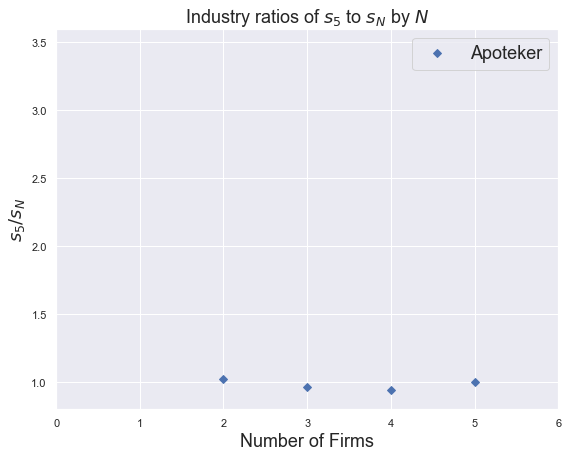

In [34]:
BIG = 18
fig = plt.figure(figsize=(9,7))
plt.plot([1,2,3,4,5], SN_S5_ratio, 'D', label='Apoteker')
ax = fig.get_axes()[0]
plt.legend(fontsize=BIG)
plt.xlim(0,6)
plt.ylim(0.8, 3.6)
plt.title('Industry ratios of $s_5$ to $s_N$ by $N$', fontsize=BIG)
plt.xlabel('Number of Firms', fontsize=BIG)
plt.ylabel('$s_5/s_N$', fontsize=BIG);
# ax.set_ylabel('$s_5/s_N$', fontsize=40)